In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [7]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.4]])

mean_02 = np.array([5,5.5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])

In [64]:
dist_01 = np.random.multivariate_normal(mean_01,cov_01,400)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,400)

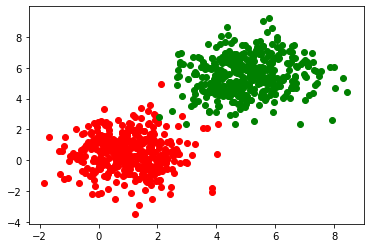

In [65]:
plt.scatter(dist_01[:,0],dist_01[:,1],color='red')
plt.scatter(dist_02[:,0],dist_02[:,1],color='green')
plt.show()

In [66]:
total = dist_01.shape[0] + dist_02.shape[0]
print(total)

800


In [67]:
data = np.zeros((total,3))
print(data.shape)

(800, 3)


In [68]:
data[:400,:-1] = dist_01
data[400:,:-1] = dist_02
data[400:,-1] = 1

In [69]:
print(data)

[[ 0.57694328  0.98635036  0.        ]
 [-0.06958966  1.87368983  0.        ]
 [-0.88587668  0.4427304   0.        ]
 ...
 [ 6.96437497  6.99634003  1.        ]
 [ 4.76132063  6.46030627  1.        ]
 [ 5.51637433  4.24539051  1.        ]]


In [70]:
np.random.shuffle(data)
print(data)

[[ 4.55099476  6.8137223   1.        ]
 [ 1.76087597 -0.98718177  0.        ]
 [ 7.39291441  5.81234087  1.        ]
 ...
 [ 4.72045818  6.0536946   1.        ]
 [ 4.71884866  3.63908624  1.        ]
 [ 5.35282079  7.68374899  1.        ]]


In [71]:
## Normalize the data
u = np.mean(data[:,:-1],axis=0)
sigma = np.std(data[:,:-1],axis=0)

data[:,:-1] = (data[:,:-1]-u)/sigma
print(data.shape)

(800, 3)


In [72]:
ones = np.ones((data.shape[0],1),dtype='float32')

In [73]:
final_data = np.hstack((ones,data))
print(final_data)

[[ 1.          0.67933928  1.36496245  1.        ]
 [ 1.         -0.55276656 -1.43345734  0.        ]
 [ 1.          1.93432018  1.0057367   1.        ]
 ...
 [ 1.          0.75417368  1.09231757  1.        ]
 [ 1.          0.75346292  0.22612466  1.        ]
 [ 1.          1.0334226   1.67706729  1.        ]]


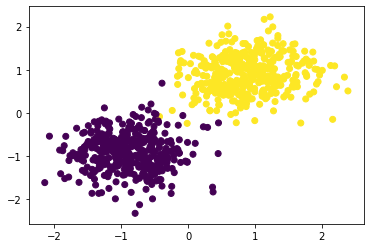

In [74]:
plt.scatter(final_data[:,1],final_data[:,2],c=final_data[:,3])
plt.show()

In [75]:
split = int(0.8*total)
print(split)

640


In [76]:
X_train = final_data[:split,:-1]
X_test = final_data[split:,:-1]

Y_train = final_data[:split,-1]
Y_test  = final_data[split:,-1]

In [77]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(640, 3) (160, 3)
(640,) (160,)


In [78]:
#np.unique(Y_test,return_counts=True)

In [220]:
np.mean(X_train,axis=0)


array([1.        , 0.01826189, 0.01339833])

In [222]:
print(Y_test)

[1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.]


## Logistic Regression

In [206]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [207]:
def hypothesis(x,theta):
    return sigmoid(np.dot(x,theta))

In [208]:
def error(Y,X,theta):
    m = X.shape[0]
    total_error = 0.0
    
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        total_error += (Y[i]*np.log2(y_hat)+(1-Y[i])*np.log2(1-y_hat)) 
        
    return total_error/m #Average Loss

In [209]:
def get_grad(Y,X,theta):
    
    grad = np.zeros(theta.shape)
    m = X.shape[0]
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        x = X[i].reshape((-1,1))
        grad += (Y[i] - y_hat)*x
        
        
    return grad/m #Average Gradient

In [215]:
def grad_descent(X,Y,learning_rate=0.5):
    theta = np.zeros((X.shape[1],1))
    
    error_list = []
    
    for i in range(500):
        theta = theta + learning_rate*get_grad(Y,X,theta)
        e = error(Y,X,theta)
        error_list.append(e)
        
    return theta,error_list

In [216]:
theta,error_list = grad_descent(X_train,Y_train)

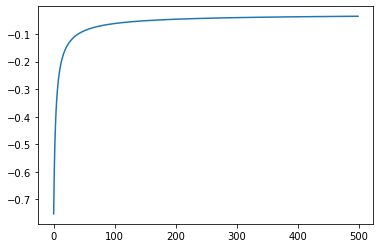

In [217]:
plt.plot(error_list)
plt.show()

In [218]:
print(theta)

[[0.10084907]
 [3.65780317]
 [3.89326585]]


[-3.         -2.33333333 -1.66666667 -1.         -0.33333333  0.33333333
  1.          1.66666667  2.33333333  3.        ]
[-2.79265811 -2.16631109 -1.53996408 -0.91361706 -0.28727004  0.33907697
  0.96542399  1.59177101  2.21811802  2.84446504]


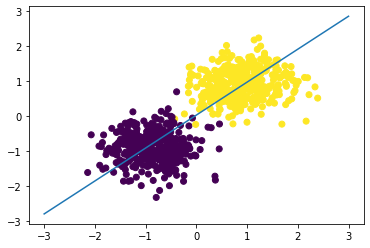

In [219]:
def drawLine():
    x = np.linspace(-3,3,10)
    print(x)
    y = (theta[0,0]*1 + theta[1,0]*x)/theta[2,0]
    plt.scatter(final_data[:,1],final_data[:,2],c=final_data[:,3])

    print(y)
    
    plt.plot(x,y)
    
drawLine()